In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib.pyplot as plt
import os

In [2]:

import pandas as pd

# CSV 파일 읽기
csv_file = "my_final.csv"  # 파일 이름
df = pd.read_csv(csv_file)

# 'smiles' 열을 리스트로 변환
smiles_list = df['smiles'].tolist()

# 결과 확인
print(smiles_list)


['C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21', 'C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21', 'O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N4CCOCC4)cc3)c2c1', 'C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21', 'C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21', 'C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@H](CNC4CCCCC4)c4ccc(Cl)cc4)CC3)c21', 'C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21', 'C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21', 'CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)C[C@H]3O)CC1)c1ccc(Cl)c(F)c1', 'CN1CCN(C[C@@H](NC(=O)C[C@H]2CNC(=O)c3cc(-c4cccc(Cl)c4)cn32)C(C)(C)C)CC1']


In [3]:
# Mol 객체 생성 및 유효한 SMILES 필터링
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]

In [4]:
mols

In [5]:
from IPython.display import display, Image

In [6]:
from rdkit.Chem import rdmolops
from rdkit.DataStructs import TanimotoSimilarity

In [7]:
# 3. Morgan Fingerprint Generator 생성
morgan_generator = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

# 4. Fingerprint 생성
fingerprints = [morgan_generator.GetFingerprint(mol) for mol in mols]

In [8]:
fingerprints

In [9]:
# 5. 유사도 계산
similarity_matrix = []
for fp1 in fingerprints:
    row = [TanimotoSimilarity(fp1, fp2) for fp2 in fingerprints]
    similarity_matrix.append(row)

# 6. 데이터프레임으로 변환 (시각화용)
similarity_df = pd.DataFrame(similarity_matrix, columns=smiles_list, index=smiles_list)


In [10]:
similarity_df

,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N4CCOCC4)cc3)c2c1,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21,C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@H](CNC4CCCCC4)c4ccc(Cl)cc4)CC3)c21,C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21,C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21,CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)C[C@H]3O)CC1)c1ccc(Cl)c(F)c1,CN1CCN(C[C@@H](NC(=O)C[C@H]2CNC(=O)c3cc(-c4cccc(Cl)c4)cn32)C(C)(C)C)CC1
C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21,1.000000,1.000000,0.135135,0.620253,0.620253,0.313131,0.607143,0.607143,0.419355,0.136752
C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC4(N)CC4)CC3)c21,1.000000,1.000000,0.135135,0.620253,0.620253,0.313131,0.607143,0.607143,0.419355,0.136752
O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N4CCOCC4)cc3)c2c1,0.135135,0.135135,1.000000,0.113208,0.113208,0.142857,0.126126,0.126126,0.140187,0.160377
C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21,0.620253,0.620253,0.113208,1.000000,1.000000,0.386364,0.607595,0.607595,0.333333,0.168224
C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc4)CC(C)(C)N)CC3)c21,0.620253,0.620253,0.113208,1.000000,1.000000,0.386364,0.607595,0.607595,0.333333,0.168224
C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@H](CNC4CCCCC4)c4ccc(Cl)cc4)CC3)c21,0.313131,0.313131,0.142857,0.386364,0.386364,1.000000,0.316327,0.316327,0.636364,0.154545
C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21,0.607143,0.607143,0.126126,0.607595,0.607595,0.316327,1.000000,1.000000,0.423913,0.168142
C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(F)c4)CC(C)(C)N)CC3)c21,0.607143,0.607143,0.126126,0.607595,0.607595,0.316327,1.000000,1.000000,0.423913,0.168142
CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)C[C@H]3O)CC1)c1ccc(Cl)c(F)c1,0.419355,0.419355,0.140187,0.333333,0.333333,0.636364,0.423913,0.423913,1.000000,0.162162
CN1CCN(C[C@@H](NC(=O)C[C@H]2CNC(=O)c3cc(-c4cccc(Cl)c4)cn32)C(C)(C)C)CC1,0.136752,0.136752,0.160377,0.168224,0.168224,0.154545,0.168142,0.168142,0.162162,1.000000


In [11]:
# 8. 후보 화합물 이름을 순차적으로 candidate1, candidate2, ..., candidate10으로 변경
renamed_indices = [f"candidate{i+1}" for i in range(len(similarity_df))]
similarity_df.index = renamed_indices
similarity_df.columns = renamed_indices

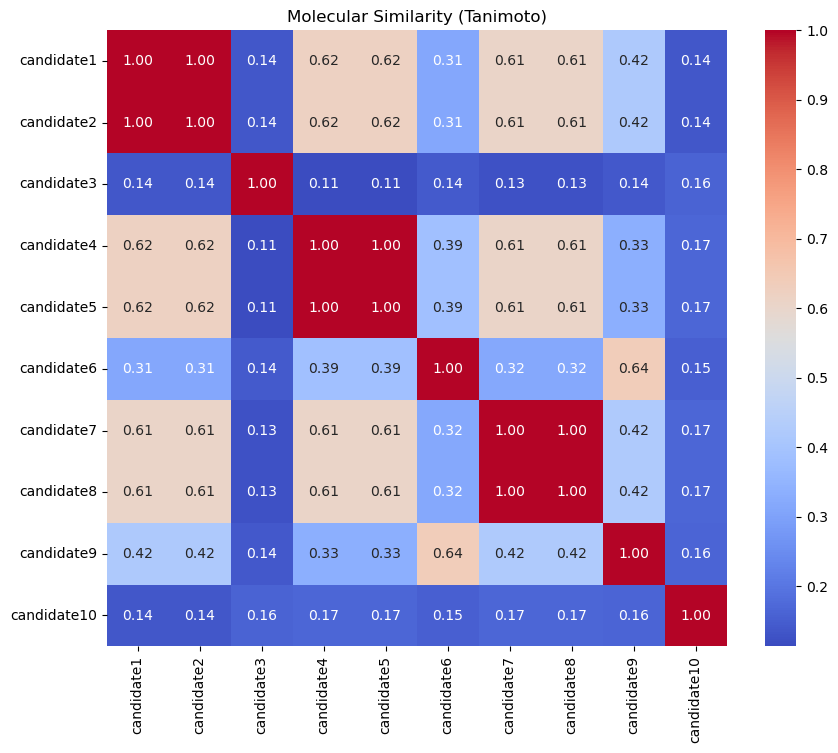

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Molecular Similarity (Tanimoto)")
plt.show()

In [14]:
# 1. 기준 리간드 (4K4.sdf) 읽기
ref_mol = Chem.SDMolSupplier("ligands list/4K4.sdf")[0]
if ref_mol is None:
    raise ValueError("Failed to read the reference molecule from 4K4.sdf")


[02:56:14] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [15]:
candidate_files = mols

In [27]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import matplotlib.pyplot as plt
from tqdm import tqdm
from rdkit import DataStructs

similarities = []
candidates = []
# Morgan Fingerprint Generator
generator = GetMorganGenerator(radius=2)  # 반경 2로 Morgan Fingerprint 생성
for mol in mols:
    if mol is not None:
        AllChem.Compute2DCoords(mol)
        candidates.append(mol)
        # Candidate 분자의 Morgan Fingerprint 생성
        cand_fp = generator.GetFingerprint(mol)

        # Tanimoto 유사도 계산
        similarity = DataStructs.TanimotoSimilarity(ref_fp, cand_fp)
        similarities.append(similarity)
    else:
        print(f"Failed to process {candidate_file}")

In [29]:
similarities

[0.14166666666666666,
 0.14166666666666666,
 0.13392857142857142,
 0.1415929203539823,
 0.1415929203539823,
 0.16964285714285715,
 0.14285714285714285,
 0.14285714285714285,
 0.1565217391304348,
 0.17543859649122806]

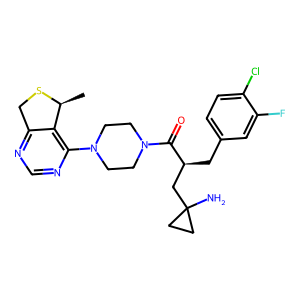

Molecule 1


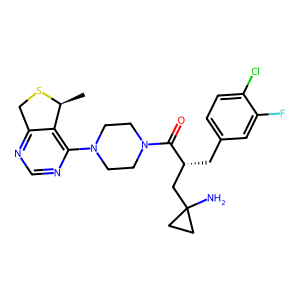

Molecule 2


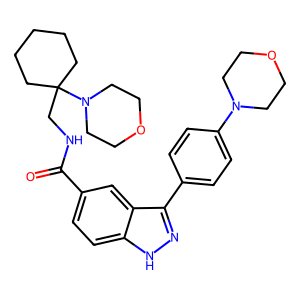

Molecule 3


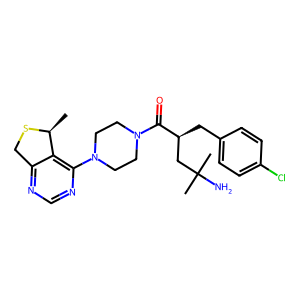

Molecule 4


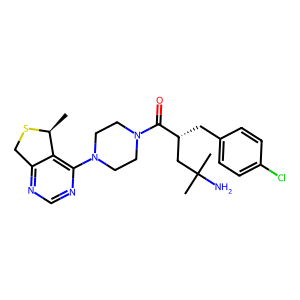

Molecule 5


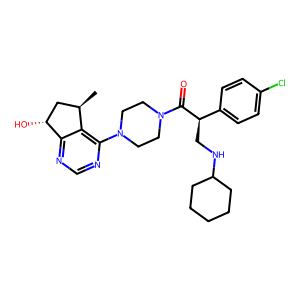

Molecule 6


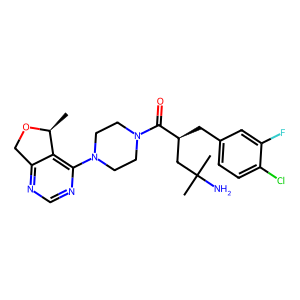

Molecule 7


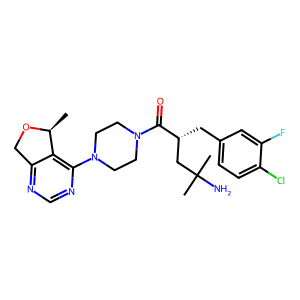

Molecule 8


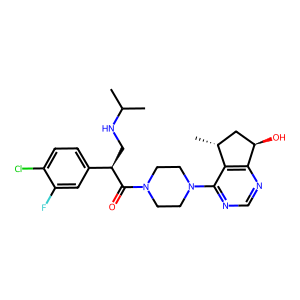

Molecule 9


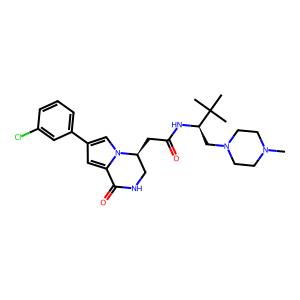

Molecule 10


In [30]:
# mols에 있는 분자들의 2D 구조를 이미지로 출력
for idx, mol in enumerate(mols):
    if mol is None:
        continue
    img = Draw.MolToImage(mol, size=(300, 300))
    display(img)
    print(f"Molecule {idx+1}")


In [31]:

# mols에 있는 분자들의 2D 구조를 이미지로 저장
for idx, mol in enumerate(mols):
    if mol is None:
        continue
    img_path = os.path.join(f'ligands list/molecule_{idx+1}.png')
    img = Draw.MolToImage(mol, size=(300, 300))
    img.save(img_path)
    print(f"Saved Molecule {idx+1} as {img_path}")


Saved Molecule 1 as ligands list/molecule_1.png
Saved Molecule 2 as ligands list/molecule_2.png
Saved Molecule 3 as ligands list/molecule_3.png
Saved Molecule 4 as ligands list/molecule_4.png
Saved Molecule 5 as ligands list/molecule_5.png
Saved Molecule 6 as ligands list/molecule_6.png
Saved Molecule 7 as ligands list/molecule_7.png
Saved Molecule 8 as ligands list/molecule_8.png
Saved Molecule 9 as ligands list/molecule_9.png
Saved Molecule 10 as ligands list/molecule_10.png


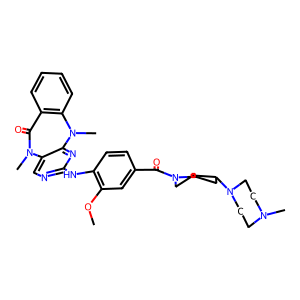

Molecule 10


In [32]:
img = Draw.MolToImage(ref_mol, size=(300, 300))
display(img)
print(f"Molecule {idx+1}")

In [33]:
img_path = os.path.join(f'ligands list/LRRK2-IN-1.png')
img = Draw.MolToImage(mol, size=(300, 300))
img.save(img_path)
print(f"Saved Molecule as {img_path}")

Saved Molecule as ligands list/LRRK2-IN-1.png
